<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [11]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


In [13]:
df.info()
df.shape
print(df.describe())
print(df['diagnosis'].value_counts())
print("\nValores faltantes por columna:\n", df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

/tmp/ipython-input-120994489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette=['#5cb85c', '#d9534f'])


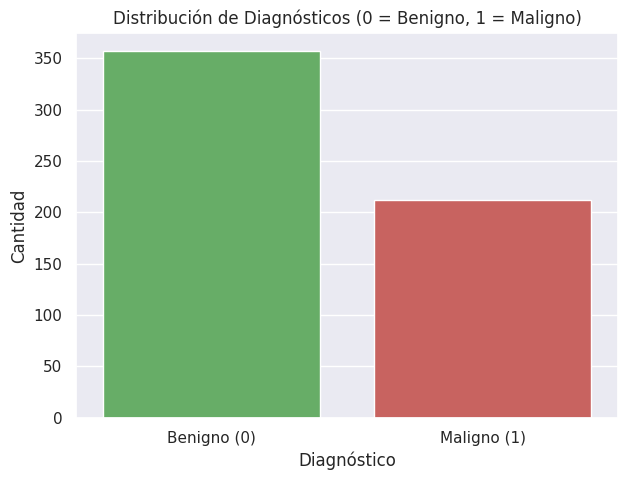

In [7]:
plt.figure(figsize=(7, 5))
sns.countplot(x='diagnosis', data=df, palette=['#5cb85c', '#d9534f'])
plt.title('Distribución de Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.xticks([0, 1], ['Benigno (0)', 'Maligno (1)'])
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

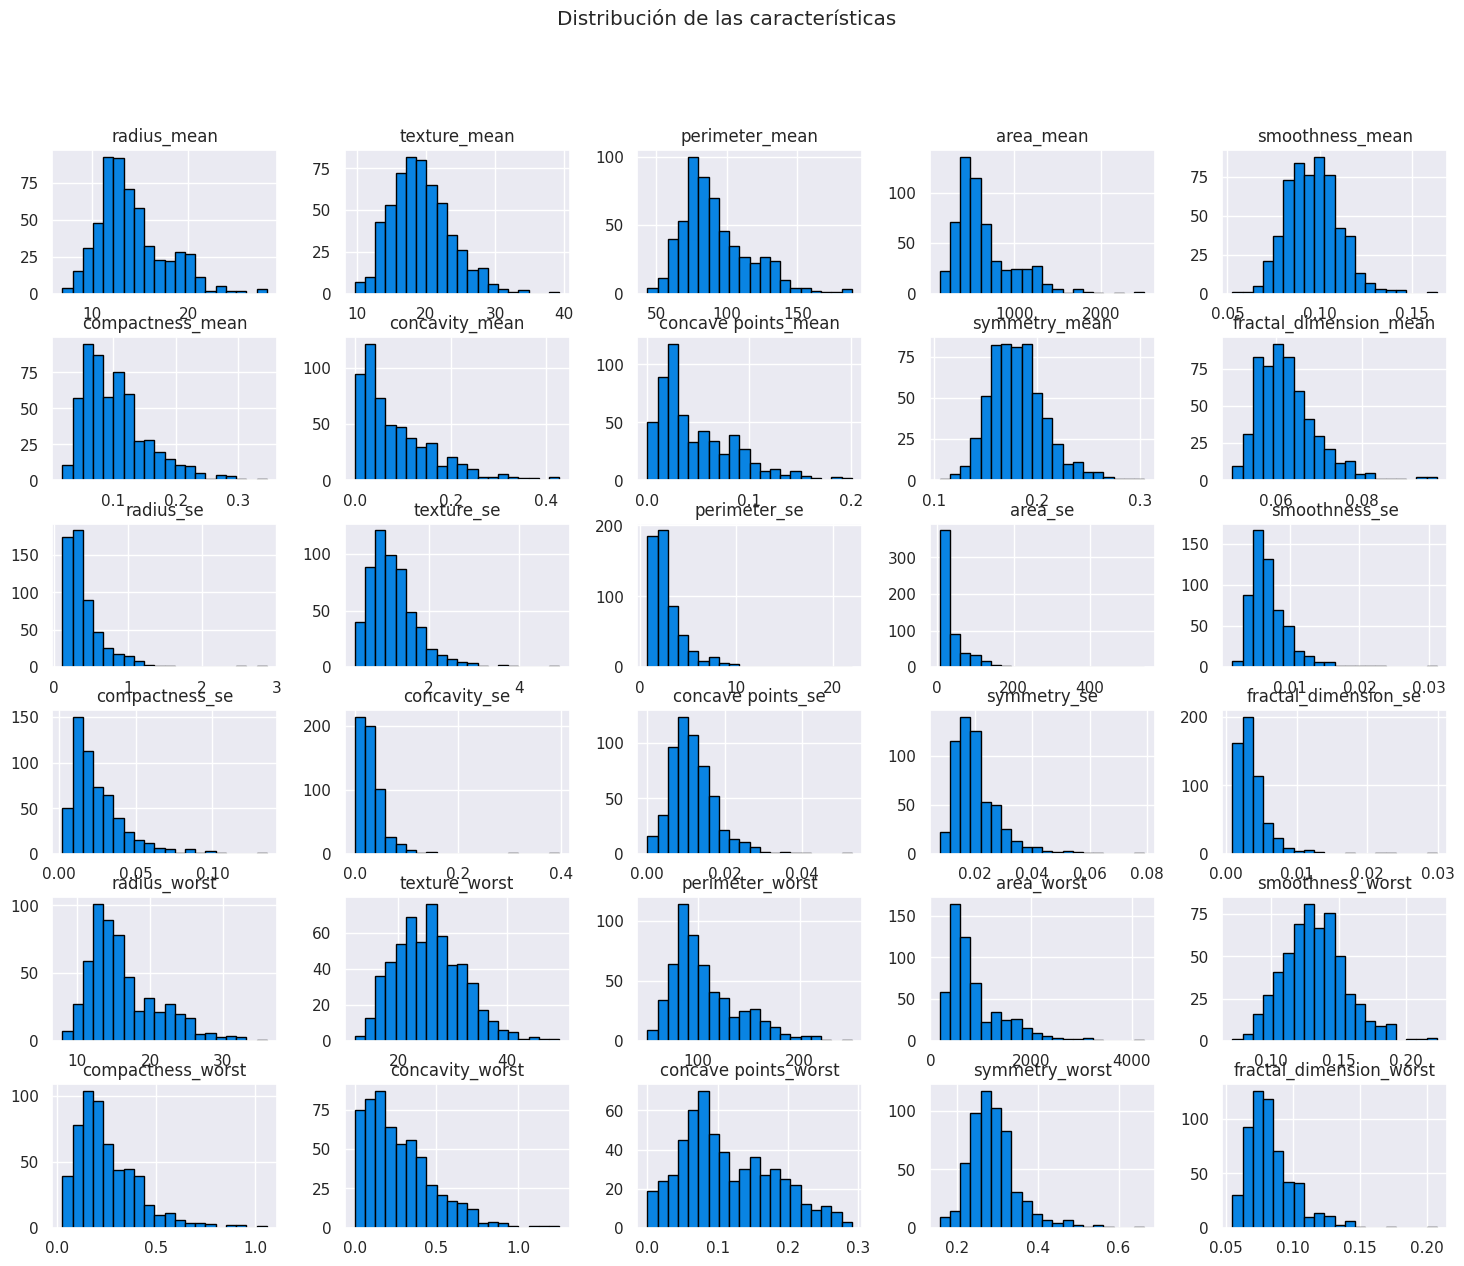

In [14]:
df_features = df.drop(columns=['diagnosis'])
df_features.hist(bins=20, figsize=(18, 14), color='#0984e3', edgecolor='black')
plt.suptitle('Distribución de las características')
plt.show()

/tmp/ipython-input-3350467536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette=['#00b894','#d63031'])
/tmp/ipython-input-3350467536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette=['#00b894','#d63031'])
/tmp/ipython-input-3350467536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette=['#00b894','#d63031'])
/tmp/ipython-input-3350467536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

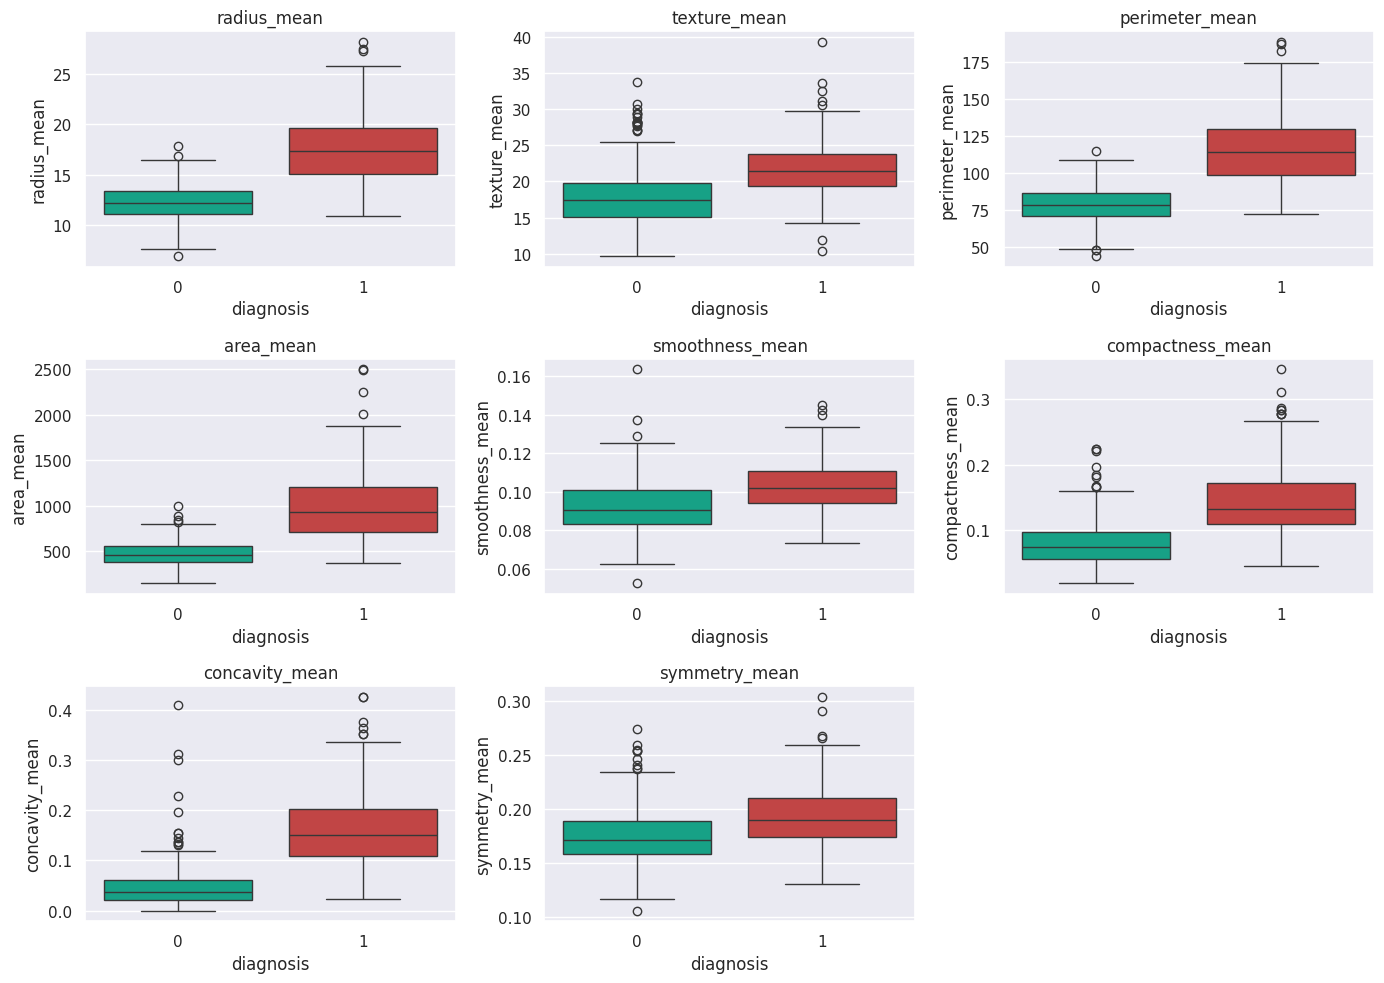

In [15]:
features_sample = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']

plt.figure(figsize=(14,10))
for i, col in enumerate(features_sample, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x='diagnosis', y=col, data=df, palette=['#00b894','#d63031'])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
def outlier_percentage(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    return 100 * len(outliers) / len(df)

outlier_perc = {col: outlier_percentage(col) for col in df_features.columns}
outlier_df = pd.DataFrame.from_dict(outlier_perc, orient='index', columns=['% Outliers']).sort_values('% Outliers', ascending=False)
display(outlier_df.head(10))

,% Outliers
area_se,11.423550
radius_se,6.678383
perimeter_se,6.678383
area_worst,6.151142
smoothness_se,5.272408
fractal_dimension_se,4.920914
compactness_se,4.920914
symmetry_se,4.745167
area_mean,4.393673
fractal_dimension_worst,4.217926


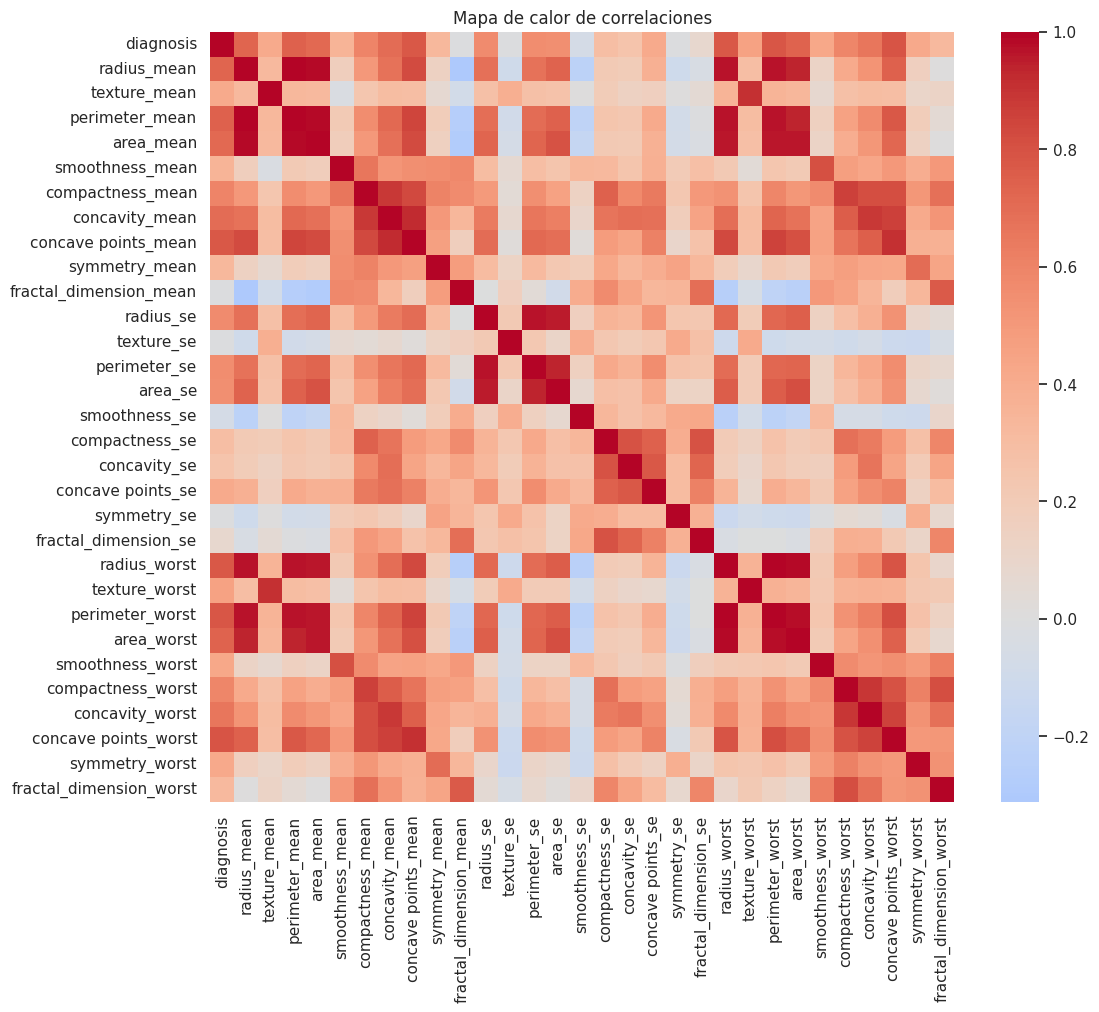

In [17]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
plt.title('Mapa de calor de correlaciones')
plt.show()

In [18]:
corr_target = corr['diagnosis'].drop('diagnosis').sort_values(ascending=False)
print("\nVariables más correlacionadas con diagnóstico (positivamente):")
display(corr_target.head(10))
print("\nVariables más correlacionadas con diagnóstico (negativamente):")
display(corr_target.tail(10))


Variables más correlacionadas con diagnóstico (positivamente):


,diagnosis
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610



Variables más correlacionadas con diagnóstico (negativamente):


,diagnosis
smoothness_mean,0.358560
symmetry_mean,0.330499
fractal_dimension_worst,0.323872
compactness_se,0.292999
concavity_se,0.253730
fractal_dimension_se,0.077972
symmetry_se,-0.006522
texture_se,-0.008303
fractal_dimension_mean,-0.012838
smoothness_se,-0.067016



2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [19]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
display(X_scaled.head())
corr_matrix = X_scaled.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(f"\nColumnas eliminadas por alta correlación (>0.9): {len(to_drop)}")
print(to_drop)

X_reduced = X_scaled.drop(columns=to_drop)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_reduced)

print(f"\nNúmero de componentes principales que explican el 95% de la varianza: {pca.n_components_}")
print(f"Forma original: {X.shape}")
print(f"Después de eliminar multicolinealidad: {X_reduced.shape}")
print(f"Después de PCA: {X_pca.shape}")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



Columnas eliminadas por alta correlación (>0.9): 10
['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

Número de componentes principales que explican el 95% de la varianza: 11
Forma original: (569, 30)
Después de eliminar multicolinealidad: (569, 20)
Después de PCA: (569, 11)


Se aplica PCA para concentrar la varianza en menos dimensiones, en este caso se mantiene en $\%95$ de la varianza total, asi se reduce el ruido y acelera el entrenamiento, es decir, es mas eficiente.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


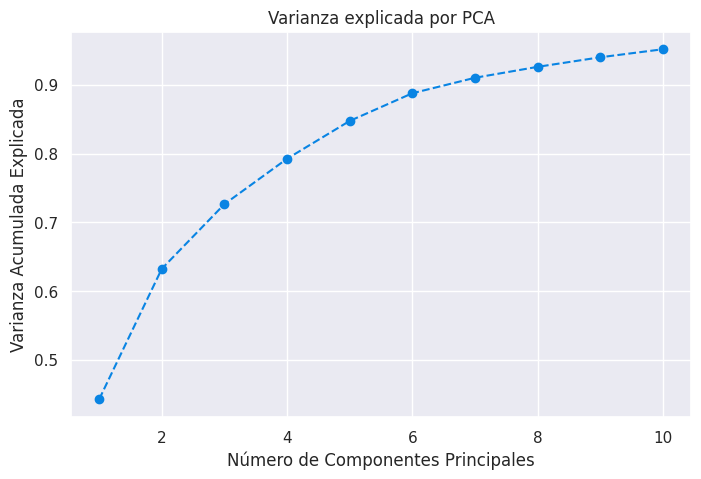

Varianza explicada por PC1: 44.27%
Varianza explicada por PC2: 18.97%
Varianza acumulada (2 componentes): 63.24%


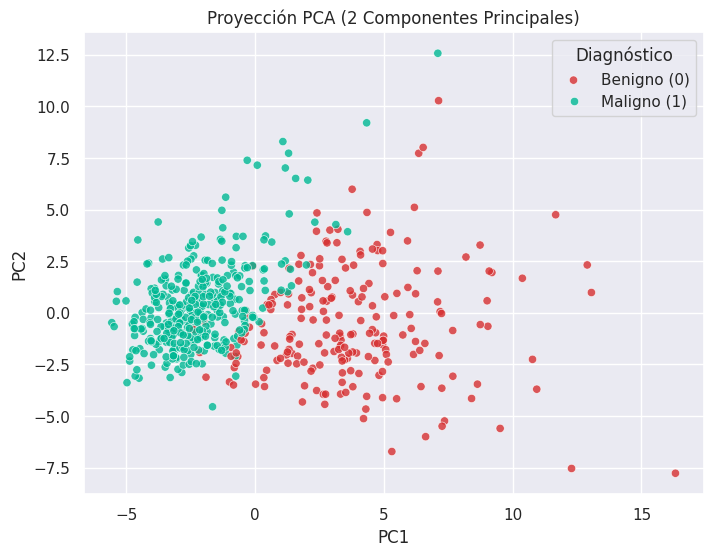

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


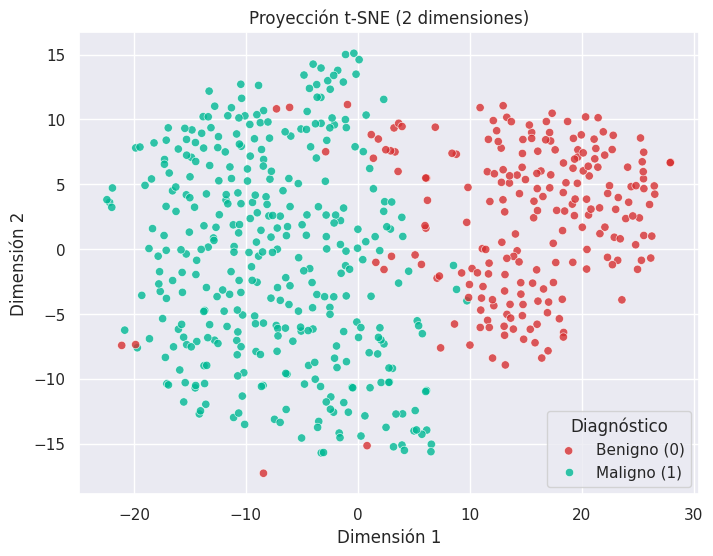

In [21]:
from sklearn.manifold import TSNE
X_scaled = StandardScaler().fit_transform(df.drop(columns=['diagnosis']))
y = df['diagnosis']
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), cum_var_exp, marker='o', linestyle='--', color='#0984e3')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()

print(f"Varianza explicada por PC1: {var_exp[0]*100:.2f}%")
print(f"Varianza explicada por PC2: {var_exp[1]*100:.2f}%")
print(f"Varianza acumulada (2 componentes): {cum_var_exp[1]*100:.2f}%")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette=['#00b894','#d63031'], alpha=0.8)
plt.title('Proyección PCA (2 Componentes Principales)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Diagnóstico', labels=['Benigno (0)', 'Maligno (1)'])
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette=['#00b894','#d63031'], alpha=0.8)
plt.title('Proyección t-SNE (2 dimensiones)')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Diagnóstico', labels=['Benigno (0)', 'Maligno (1)'])
plt.show()

El PCA muestra que las primeras dimensiones concentran gran parte de la varianza y permiten una separacion aceptable, mientras que t-SNE muestra que la relacion no es solo lineal y que los modelos no lineales como SVM y Random Forest, tendran mejor rendimiento.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


,Modelo,Mejores Hiperparámetros,Accuracy,Precision,Recall,F1,AUC
1,SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.973684,1.000000,0.928571,0.962963,0.995040
0,Regresión Logística,{'C': 1},0.964912,0.975000,0.928571,0.951220,0.996032
2,Random Forest,"{'max_depth': 6, 'min_samples_split': 2, 'n_es...",0.964912,1.000000,0.904762,0.950000,0.995370
3,KNN,"{'n_neighbors': 3, 'weights': 'uniform'}",0.938596,0.972973,0.857143,0.911392,0.982474



 Mejor modelo según F1-score: SVM


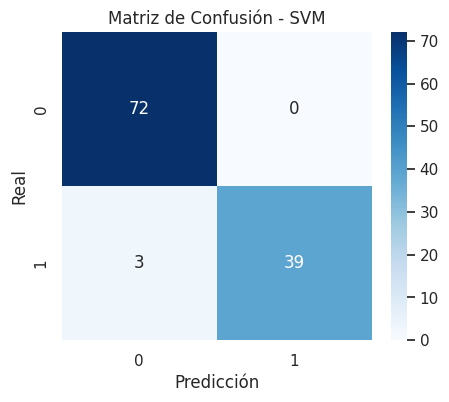

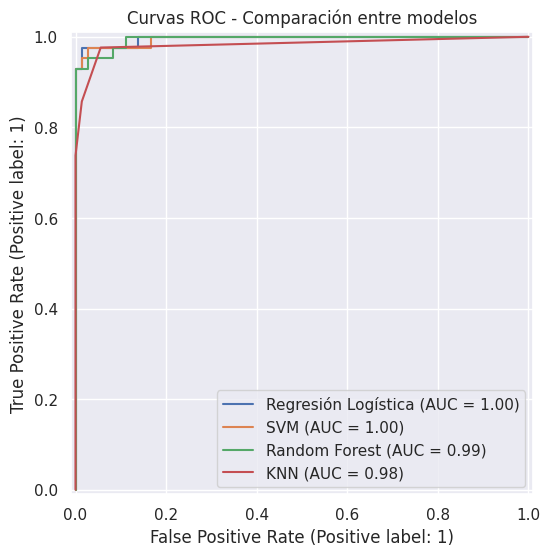

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


modelos = {
    'Regresión Logística': {
        'model': LogisticRegression(max_iter=10000),
        'params': {'C': [0.01, 0.1, 1, 10, 100]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [100, 200, 500], 'max_depth': [4, 6, 8, None], 'min_samples_split': [2, 5, 10]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    }
}


resultados = []

for nombre, conf in modelos.items():
    grid = GridSearchCV(conf['model'], conf['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:,1]

    resultados.append({
        'Modelo': nombre,
        'Mejores Hiperparámetros': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })

resultados_df = pd.DataFrame(resultados).sort_values(by='F1', ascending=False)
display(resultados_df)


mejor_modelo = resultados_df.iloc[0]['Modelo']
print(f"\n Mejor modelo según F1-score: {mejor_modelo}")

best_estimator = modelos[mejor_modelo]['model'].set_params(**resultados_df.iloc[0]['Mejores Hiperparámetros'])
best_estimator.fit(X_train, y_train)
y_pred_best = best_estimator.predict(X_test)

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión - {mejor_modelo}')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(8,6))
for nombre, conf in modelos.items():
    modelo = conf['model'].set_params(**resultados_df[resultados_df['Modelo']==nombre]['Mejores Hiperparámetros'].values[0])
    modelo.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(modelo, X_test, y_test, ax=plt.gca(), name=nombre)

plt.title('Curvas ROC - Comparación entre modelos')
plt.show()


El mejor modelo es SVM, pues tiene mayor F1-score y AUC-ROC, lo que indica un mejor compromiso entre precisión y generalización.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El mejor modelo para este dataset fue SVM, pues tuvo los mejores puntajes para precisión, recall, F1-score y AUC-ROC, lo que implica una alta capacidad par identificar entre tumores benignos y malignos

El preprocesamiento ayudo con normalizar para que SVM y KNN trabajaron de forma efectiva, reduciendo redundancias.

Se puede aplicar mejores metodos para aumentar la precision, cambiando el modelo o mejores metodos de interpretacion, mejores balanceos de clases y modelos combinados.